<a href="https://colab.research.google.com/github/aai510-group1/project/blob/main/Project_Telco_dina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 15.4 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 11.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 23.5 MB/s eta 0:00:0031m24.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 23.7 MB/s eta 0:00:0031m25.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.1 MB/s eta 0:00:0031m25.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 13.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.3 MB/s eta 0:00:0031m25.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 23.6 MB/s eta 0:00:00 MB/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
df = pd.read_csv('Telco_customer_churn.csv')
df.head()

,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# Preprocessing  

In [ ]:
# drop customer ID , Count, Country since they are not relevant to the analysis
df.drop(columns=['Customer ID','Count','Country'], inplace=True)
# drop churn Label since it is same as Churn value and drop Churn score since it is the predicted probability of churn. Also drop Churn reason since it is after the fact
df.drop(columns=['Churn Label','Churn Score','Churn Reason'], inplace=True)


In [ ]:
# find non-numerical features and convert to numerical features
# Find non-numerical features
non_numerical_features = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each non-numerical feature and perform label encoding
for feature in non_numerical_features:
    df[feature] = label_encoder.fit_transform(df[feature])


# Display the first few rows after label encoding
print("First 5 rows after label encoding:")
print(df.head())

First 5 rows after label encoding:
   State  City  Zip Code  Lat Long   Latitude   Longitude  Gender  \
0      0   562     90003       327  33.964131 -118.272783       1   
1      0   562     90005       405  34.059281 -118.307420       0   
2      0   562     90006       393  34.048013 -118.293953       0   
3      0   562     90010       410  34.062125 -118.315709       0   
4      0   562     90015       385  34.039224 -118.266293       1   

   Senior Citizen  Partner  Dependents  ...  Tech Support  Streaming TV  \
0               0        0           0  ...             0             0   
1               0        0           1  ...             0             0   
2               0        0           1  ...             0             2   
3               0        1           1  ...             2             2   
4               0        0           1  ...             0             2   

   Streaming Movies  Contract  Paperless Billing  Payment Method  \
0                 0         0  

In [ ]:
# Summary statistics
print("Summary statistics:")
print(df.describe())

Summary statistics:
        State         City      Zip Code     Lat Long     Latitude  \
count  7043.0  7043.000000   7043.000000  7043.000000  7043.000000   
mean      0.0   593.713616  93521.964646   793.535567    36.282441   
std       0.0   314.990288   1865.794555   480.597035     2.455723   
min       0.0     0.000000  90001.000000     0.000000    32.555828   
25%       0.0   337.000000  92102.000000   376.000000    34.030915   
50%       0.0   601.000000  93552.000000   771.000000    36.391777   
75%       0.0   869.000000  95351.000000  1211.000000    38.224869   
max       0.0  1128.000000  96161.000000  1651.000000    41.962127   

         Longitude       Gender  Senior Citizen      Partner   Dependents  \
count  7043.000000  7043.000000     7043.000000  7043.000000  7043.000000   
mean   -119.798880     0.504756        0.162147     0.483033     0.231010   
std       2.157889     0.500013        0.368612     0.499748     0.421508   
min    -124.301372     0.000000        0.

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Value          0
CLTV                 0
dtype: int64


/home/ahmed/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


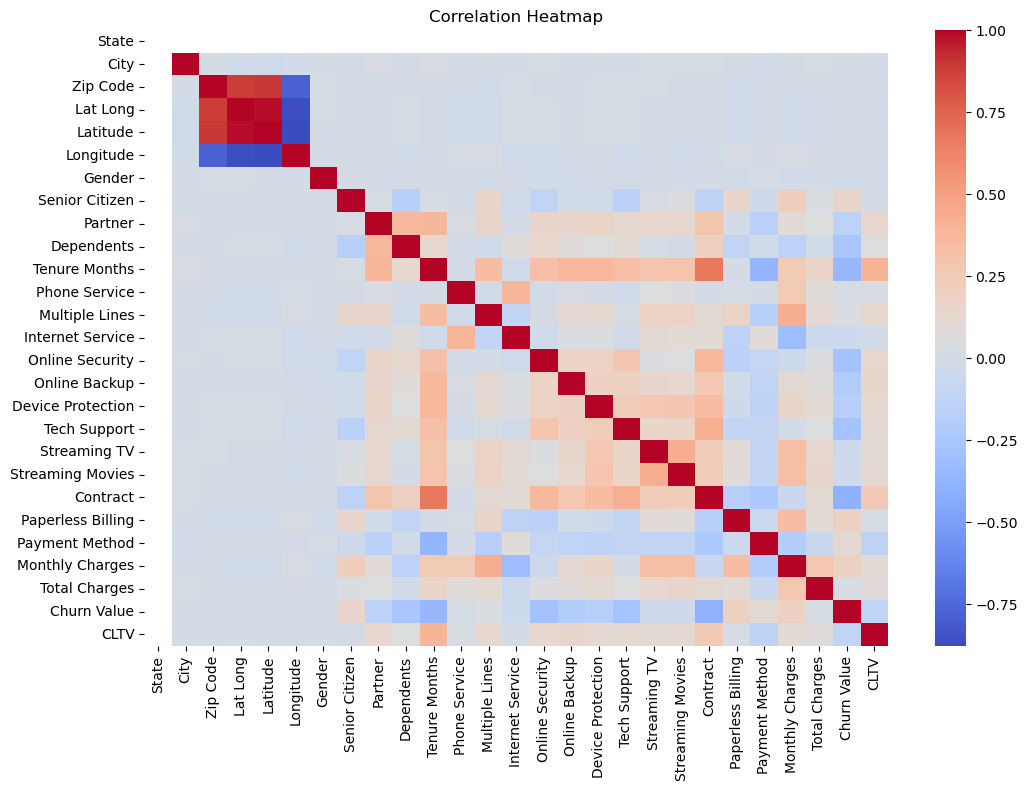

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

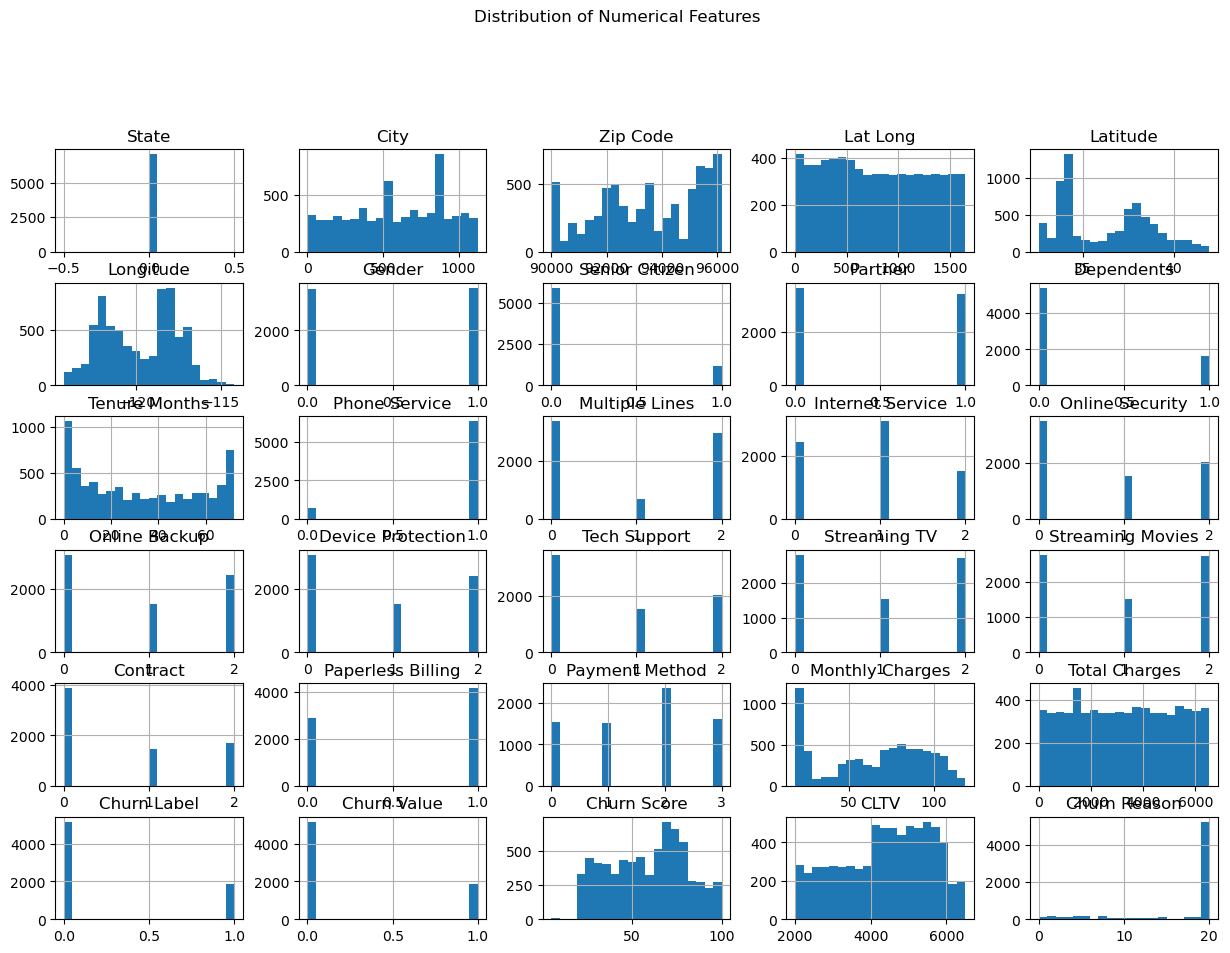

In [ ]:
# Distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

# Baseline Prediction using Decision Tree

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Churn Value'])
y = df['Churn Value']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

# Evaluate Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)

print("Baseline Decision Tree Metrics:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1 Score: {dt_f1}")
print("Confusion Matrix:")
print(dt_conf_matrix)

Baseline Decision Tree Metrics:
Accuracy: 0.7267565649396736
Precision: 0.5188916876574308
Recall: 0.515
F1 Score: 0.5169385194479298
Confusion Matrix:
[[818 191]
 [194 206]]


# Prediction using XGboost

In [ ]:
# XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)

print("\nXGBoost Classifier Metrics:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1 Score: {xgb_f1}")
print("Confusion Matrix:")
print(xgb_conf_matrix)


XGBoost Classifier Metrics:
Accuracy: 0.7899219304471257
Precision: 0.6575757575757576
Recall: 0.5425
F1 Score: 0.5945205479452055
Confusion Matrix:
[[896 113]
 [183 217]]


# Hyperparam to optimize Xgboost

In [ ]:
 #Define parameter grid for Grid Search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Predict using the best model
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nBest XGBoost Classifier Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Score: 0.8099071553866739

Best XGBoost Classifier Metrics:
Accuracy: 0.7984386089425124
Precision: 0.6870967741935484
Recall: 0.5325
F1 Score: 0.6
Confusion Matrix:
[[912  97]
 [187 213]]


# Predicting using Deep Neural Networks

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the deep neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Deep Neural Network Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/50


/home/ahmed/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6820 - loss: 0.5843 - val_accuracy: 0.8066 - val_loss: 0.4185
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.7788 - loss: 0.4514 - val_accuracy: 0.8163 - val_loss: 0.4095
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.7775 - loss: 0.4492 - val_accuracy: 0.8154 - val_loss: 0.4047
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.7869 - loss: 0.4324 - val_accuracy: 0.8199 - val_loss: 0.4021
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.8038 - loss: 0.4089 - val_accuracy: 0.8208 - val_loss: 0.3987
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.8006 - loss: 0.4144 - val_accuracy: 0.8261 - val_loss: 0.3944
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.7921 - loss: 0.4246 - val_accuracy: 0.8243 - val_loss: 0.3913
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.8020 - loss: 0.4156 - val_accuracy: